In [2]:
import pandas as pd

In [4]:
data = pd.read_csv(r"salaries.csv")

In [6]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


In [16]:
data["work_year"].value_counts()

work_year
2025    68847
2024    62241
2023     8524
2022     1661
2021      218
2020       75
Name: count, dtype: int64

In [14]:
corr = data['work_year'].corr(data['salary_in_usd'])
print(corr)


0.017164646773951305


In [5]:
data.shape

(141566, 11)

In [6]:
# Drop unnecessary columns but keep experience_level
data = data.drop(columns=["work_year", "salary", "salary_currency", "employee_residence"])

In [7]:
data.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,EN,FT,Data Quality Analyst,75949,0,GB,M
1,EN,FT,Data Quality Analyst,60759,0,GB,M
2,SE,FT,Applied Scientist,266000,0,US,M
3,SE,FT,Applied Scientist,204000,0,US,M
4,SE,FT,Data Scientist,291000,0,US,M


In [8]:
data.isna().sum()

experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [9]:
data["employment_type"].value_counts()

employment_type
FT    140725
CT       432
PT       393
FL        16
Name: count, dtype: int64

In [10]:
data["employment_type"] = data["employment_type"].replace(["CT", "PT", "FL"], "NFT")

In [11]:
data["employment_type"].value_counts()

employment_type
FT     140725
NFT       841
Name: count, dtype: int64

In [12]:
data["job_title"].value_counts()

job_title
Data Scientist              17934
Software Engineer           15880
Data Engineer               15539
Data Analyst                13087
Engineer                    10144
                            ...  
Network Engineer                1
BI & Data Analyst               1
Marketing Data Scientist        1
Quant Trader                    1
Data Engineer 4                 1
Name: count, Length: 410, dtype: int64

In [13]:
def create_improved_job_categories(df):

    def categorize_job_improved(job_title):
        job_title = job_title.lower().strip()

        # Handle non-English first
        if job_title == 'cientista de dados':
            job_title = 'data scientist'

        # Data Science & ML (keep existing)
        if any(word in job_title for word in ['data scientist', 'ml', 'machine learning', 'ai ', 'artificial intelligence']):
            return 'Data Science & ML'

        # Data Engineering (keep existing)
        elif any(word in job_title for word in ['data engineer', 'data architect']):
            return 'Data Engineering'

        # Data Analytics (expand to catch more analyst roles)
        elif any(word in job_title for word in [
            'data analyst', 'business analyst', 'bi ', 'analytics', 'business intelligence analyst',
            'data management analyst', 'quantitative analyst', 'insight analyst', 'data operations analyst',
            'data quality analyst', 'data governance analyst', 'data reporting analyst', 'data visualization analyst',
            'data integration analyst', 'data integrity analyst', 'pricing analyst', 'marketing analyst',
            'risk analyst', 'product analyst', 'actuarial analyst', 'data analist'  # includes typo
        ]):
            return 'Data Analytics'

        # Software Engineering (keep existing)
        elif any(word in job_title for word in ['software engineer', 'developer', 'programmer']):
            return 'Software Engineering'

        # DevOps & Cloud (keep existing)
        elif any(word in job_title for word in ['devops', 'cloud', 'infrastructure', 'platform']):
            return 'DevOps & Cloud'

        # Security (keep existing)
        elif any(word in job_title for word in ['security', 'cyber']):
            return 'Security'

        # Network & Systems (expand - now includes database administrator)
        elif any(word in job_title for word in [
            'network', 'system admin', 'systems administrator', 'salesforce administrator',
            'elasticsearch administrator', 'database administrator', 'dba'
        ]):
            return 'Network & Systems'

        # Management & Leadership (keep existing)
        elif any(word in job_title for word in ['manager', 'director', 'head', 'lead', 'principal']):
            return 'Management & Leadership'

        # Research (expand)
        elif any(word in job_title for word in [
            'research', 'scientist', 'postdoctoral fellow', 'post doctoral fellow',
            'computational biologist', 'bioinformatician', 'bioinformatics specialist'
        ]):
            return 'Research'

        # Consulting (keep existing)
        elif any(word in job_title for word in ['consultant', 'consulting']):
            return 'Consulting'

        # Architecture & Design (new category)
        elif any(word in job_title for word in [
            'architect', 'solutions architect', 'solution architect', 'software architect',
            'technical architect', 'data governance architect'
        ]):
            return 'Architecture & Design'

        # Data Management & Governance (new category)
        elif any(word in job_title for word in [
            'data specialist', 'data governance', 'data management', 'data steward',
            'data operations specialist', 'data integration specialist', 'data visualization specialist',
            'data reporting specialist', 'data integrity specialist', 'data quality expert',
            'data management specialist', 'data governance specialist', 'data operations',
            'data management associate', 'data operations associate', 'data integrator',
            'data integration coordinator', 'data management coordinator', 'data management technician',
            'data management professional', 'data archivist', 'data management expert',
            'data operator', 'data reporter', 'master data specialist', 'safety data management specialist'
        ]):
            return 'Data Management & Governance'

        # Business Intelligence (new category)
        elif any(word in job_title for word in [
            'business intelligence', 'power bi', 'data and reporting professional'
        ]):
            return 'Business Intelligence'

        # Product & Strategy (new category)
        elif any(word in job_title for word in [
            'product designer', 'product owner', 'data product owner', 'product specialist',
            'data strategist', 'data product analyst'
        ]):
            return 'Product & Strategy'

        # Finance & Actuarial (new category)
        elif any(word in job_title for word in [
            'actuary', 'statistician', 'quantitative trader', 'quant trader', 'quant options trader',
            'quantitative risk analyst', 'experienced quantitative strategist'
        ]):
            return 'Finance & Actuarial'

        # Sales & Business Development (new category - now includes sales development representative)
        elif any(word in job_title for word in [
            'account executive', 'enterprise account executive', 'business development representative',
            'sales development representative', 'sales development', 'business development'
        ]):
            return 'Sales & Business Development'

        # Clinical & Healthcare (new category)
        elif any(word in job_title for word in [
            'clinical data operator', 'clinical aide', 'encounter data management professional'
        ]):
            return 'Clinical & Healthcare'

        # Technical Support & Operations (new category)
        elif any(word in job_title for word in [
            'technical support specialist', 'technical writer', 'technical recruiter',
            'technology integrator', 'integration specialist', 'solution specialist'
        ]):
            return 'Technical Support & Operations'

        # Quality Assurance (new category)
        elif any(word in job_title for word in ['qa tutor reviewer']):
            return 'Quality Assurance'

        # Marketing & Creative (new category)
        elif any(word in job_title for word in [
            'marketing science partner', 'copywriter', 'creative technologist',
            'data visualization designer', 'data visualization expert'
        ]):
            return 'Marketing & Creative'

        # General Analyst roles (catch remaining analysts)
        elif 'analyst' in job_title:
            return 'Other Analysts'

        # General Associate roles
        elif any(word in job_title for word in ['associate', 'member of technical staff']):
            return 'Associate Roles'

        # Executive roles
        elif 'executive' in job_title:
            return 'Executive Roles'

        # Entry-level/Training roles
        elif any(word in job_title for word in ['trainee', 'stage', 'alternance']):
            return 'Entry Level & Training'

        # Specialized Professional roles
        elif any(word in job_title for word in [
            'economist', 'psychometrician', 'commercial counsel', 'data modeler'
        ]):
            return 'Specialized Professional'

        # Other engineering (keep existing)
        elif 'engineer' in job_title:
            return 'Other Engineering'

        # Data Analysis (catch remaining data analysis roles)
        elif 'data analysis' in job_title:
            return 'Data Analytics'

        # Specialist roles (catch remaining specialists)
        elif 'specialist' in job_title:
            return 'Specialist Roles'

        # Catch remaining company-specific or unique roles
        elif any(word in job_title for word in [
            'bear robotics', 'airs solutions specialist', 'autonomous vehicle technician'
        ]):
            return 'Company Specific Roles'

        else:
            return job_title

    # Apply improved categorization
    df['job_title'] = df['job_title'].apply(categorize_job_improved)

    print("=== IMPROVED JOB CATEGORIZATION ===")
    print(f"Reduced from 420+ to {df['job_title'].nunique()} categories\n")
    print(df['job_title'].value_counts())

    return df

data = create_improved_job_categories(data)


=== IMPROVED JOB CATEGORIZATION ===
Reduced from 420+ to 28 categories

job_title
Data Science & ML                 31081
Data Analytics                    19652
Software Engineering              18838
Data Engineering                  17696
Management & Leadership           14103
Other Engineering                 14075
Research                           8892
Other Analysts                     4814
Associate Roles                    2397
Data Management & Governance       2217
Architecture & Design              1975
DevOps & Cloud                     1502
Business Intelligence              1362
Consulting                         1335
Product & Strategy                  610
Specialized Professional            218
Sales & Business Development        187
Finance & Actuarial                 170
Security                             90
Executive Roles                      74
Technical Support & Operations       73
Specialist Roles                     49
Network & Systems                    4

In [14]:
data["company_location"].value_counts().head(20)

company_location
US    126870
CA      5678
GB      3923
AU       548
NL       432
DE       412
FR       399
LT       354
AT       331
ES       287
SK       224
IN       221
PL       158
IE       142
LV       118
MX       111
BR       106
PT        82
AR        80
FI        76
Name: count, dtype: int64

In [15]:
def hybrid_location_grouping(df, min_samples_threshold=1000):
    """Convert country codes to full names and group smaller countries by region"""

    # Country code to full name mapping
    country_names = {
        'US': 'United States', 'CA': 'Canada', 'GB': 'United Kingdom', 'AU': 'Australia',
        'DE': 'Germany', 'FR': 'France', 'NL': 'Netherlands', 'ES': 'Spain', 'IT': 'Italy',
        'CH': 'Switzerland', 'AT': 'Austria', 'BE': 'Belgium', 'SE': 'Sweden', 'NO': 'Norway',
        'DK': 'Denmark', 'FI': 'Finland', 'IE': 'Ireland', 'PT': 'Portugal', 'PL': 'Poland',
        'CZ': 'Czech Republic', 'GR': 'Greece', 'RO': 'Romania', 'HR': 'Croatia', 'SI': 'Slovenia',
        'SK': 'Slovakia', 'LU': 'Luxembourg', 'MT': 'Malta', 'EE': 'Estonia', 'LV': 'Latvia',
        'LT': 'Lithuania', 'BG': 'Bulgaria', 'HU': 'Hungary', 'CY': 'Cyprus', 'MX': 'Mexico',
        'BR': 'Brazil', 'AR': 'Argentina', 'CL': 'Chile', 'CO': 'Colombia', 'JP': 'Japan',
        'KR': 'South Korea', 'SG': 'Singapore', 'HK': 'Hong Kong', 'CN': 'China', 'IN': 'India',
        'RU': 'Russia', 'TR': 'Turkey', 'ZA': 'South Africa', 'AE': 'UAE', 'SA': 'Saudi Arabia',
        'IL': 'Israel', 'EG': 'Egypt', 'AS':'American Samoa'
    }

    # Regional groupings for smaller countries
    regional_groups = {
        'Europe (Other)': ['NL', 'ES', 'IT', 'CH', 'AT', 'BE', 'SE', 'NO', 'DK', 'FI', 'IE', 'PT',
                          'PL', 'CZ', 'GR', 'RO', 'HR', 'SI', 'SK', 'LU', 'MT', 'EE', 'LV', 'LT',
                          'BG', 'HU', 'CY', 'DE', 'FR', 'UA', 'MK', 'RS', 'BA', 'MD', 'AD'],
        'Asia Pacific (Other)': ['AU', 'JP', 'KR', 'SG', 'HK', 'CN', 'IN', 'RU', 'NZ', 'PH', 'TW',
                                'ID', 'VN', 'TH', 'MY', 'PK'],
        'Latin America': ['MX', 'BR', 'AR', 'CL', 'CO', 'JM', 'PR', 'PE', 'CR', 'SV', 'EC', 'DO',
                         'VE', 'PA', 'HN', 'GT', 'BS', 'AS'],
        'Middle East & Africa': ['TR', 'ZA', 'AE', 'SA', 'IL', 'EG', 'LB', 'NG', 'AM', 'KE', 'JO',
                               'DZ', 'GH', 'CD', 'CF', 'LS', 'XK', 'ZM', 'IQ', 'IR', 'MU', 'QA',
                               'GI', 'OM']
    }

    # Check current distribution
    country_counts = df['company_location'].value_counts()
    print(f"Countries with {min_samples_threshold}+ samples (KEPT SEPARATE):")
    major_countries = country_counts[country_counts >= min_samples_threshold].index.tolist()
    print([country_names.get(c, c) for c in major_countries])

    def map_location(country):
        count = country_counts.get(country, 0)

        # Keep major countries, convert to full name
        if count >= min_samples_threshold:
            return country_names.get(country, country)

        # Group smaller countries by region
        for region, countries in regional_groups.items():
            if country in countries:
                return region

        return country

    df['company_location'] = df['company_location'].apply(map_location)

    print(f"\n=== FINAL RESULTS ===")
    final_counts = df['company_location'].value_counts()
    print(final_counts)

    return df

# Apply the grouping
data = hybrid_location_grouping(data, min_samples_threshold=1000)

Countries with 1000+ samples (KEPT SEPARATE):
['United States', 'Canada', 'United Kingdom']

=== FINAL RESULTS ===
company_location
United States           126870
Canada                    5678
United Kingdom            3923
Europe (Other)            3378
Asia Pacific (Other)      1040
Latin America              435
Middle East & Africa       242
Name: count, dtype: int64


In [16]:
data["remote_ratio"].value_counts()

remote_ratio
0      111727
100     29516
50        323
Name: count, dtype: int64

In [17]:
data['remote_ratio'] = data['remote_ratio'].replace(50, 100)
data["remote_ratio"].value_counts()


remote_ratio
0      111727
100     29839
Name: count, dtype: int64

In [18]:
data["company_size"].value_counts()

company_size
M    137599
L      3750
S       217
Name: count, dtype: int64

In [19]:
data['company_size'] = data['company_size'].replace('S', 'M')
data["company_size"].value_counts()

company_size
M    137816
L      3750
Name: count, dtype: int64

In [20]:
data.head(20)

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,EN,FT,Data Analytics,75949,0,United Kingdom,M
1,EN,FT,Data Analytics,60759,0,United Kingdom,M
2,SE,FT,Research,266000,0,United States,M
3,SE,FT,Research,204000,0,United States,M
4,SE,FT,Data Science & ML,291000,0,United States,M
5,SE,FT,Data Science & ML,197000,0,United States,M
6,SE,FT,Data Science & ML,349000,0,United States,M
7,SE,FT,Data Science & ML,248000,0,United States,M
8,SE,FT,Data Science & ML,279400,100,United States,M
9,SE,FT,Data Science & ML,211582,100,United States,M


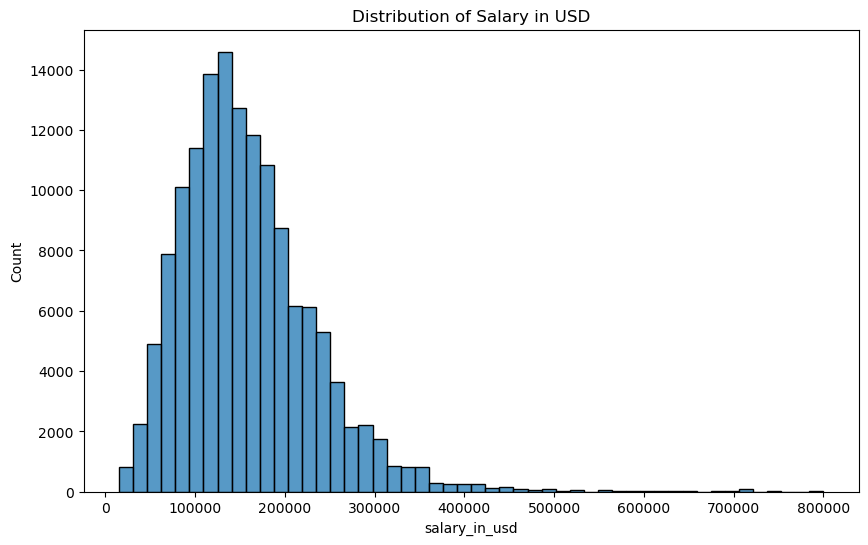

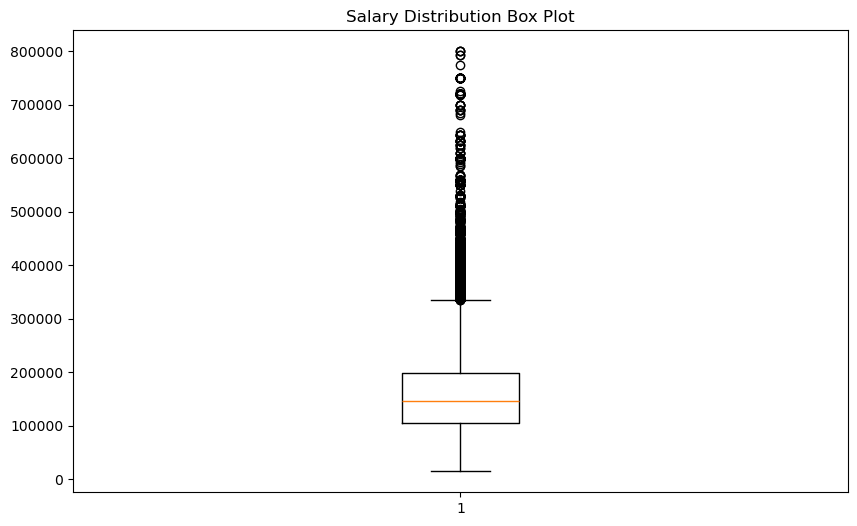


Salary Statistics:
count    141566.000000
mean     157496.750682
std       74132.383476
min       15000.000000
25%      106000.000000
50%      146147.500000
75%      198000.000000
max      800000.000000
Name: salary_in_usd, dtype: float64


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=50)
plt.title('Distribution of Salary in USD')
plt.show()

# Box plot for salary distribution
plt.figure(figsize=(10, 6))
plt.boxplot(data['salary_in_usd'])
plt.title('Salary Distribution Box Plot')
plt.show()

# Check basic statistics
print("\nSalary Statistics:")
print(data['salary_in_usd'].describe())

Original salary range: 15000 - 800000
Log-transformed salary range: 9.615805480084347 - 13.592367006650065


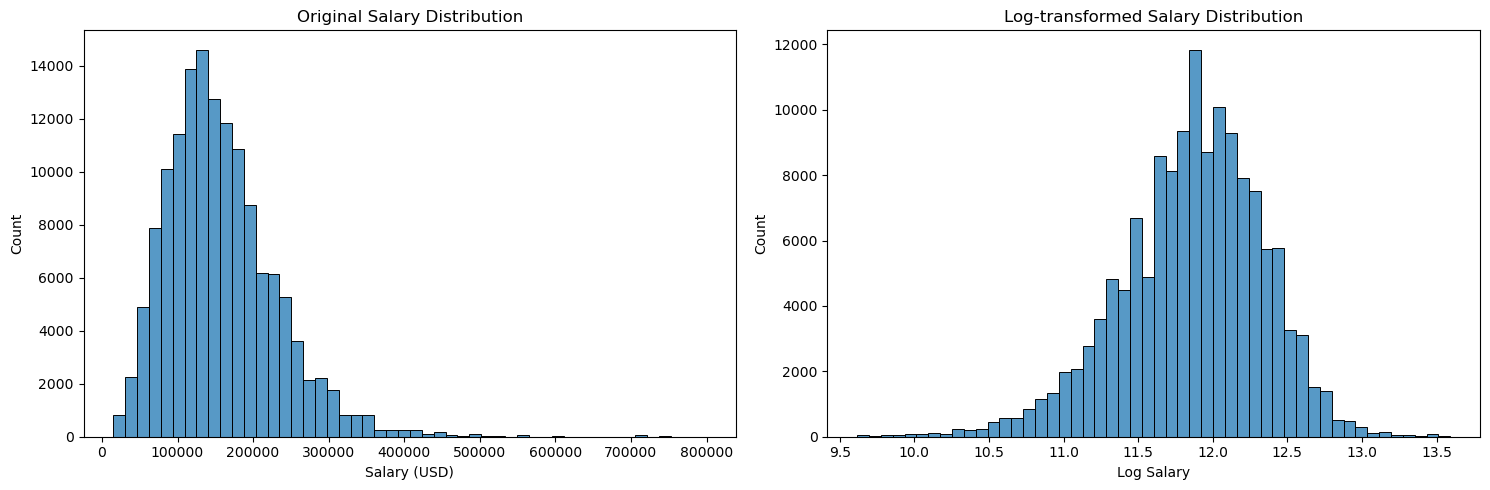

In [25]:
# Add log-transformed salary
import numpy as np
from sklearn.compose import ColumnTransformer

data['log_salary'] = np.log(data['salary_in_usd'])

print("Original salary range:", data['salary_in_usd'].min(), "-", data['salary_in_usd'].max())
print("Log-transformed salary range:", data['log_salary'].min(), "-", data['log_salary'].max())

# Visualize the distribution of original vs log-transformed salary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=data, x='salary_in_usd', bins=50, ax=ax1)
ax1.set_title('Original Salary Distribution')
ax1.set_xlabel('Salary (USD)')

sns.histplot(data=data, x='log_salary', bins=50, ax=ax2)
ax2.set_title('Log-transformed Salary Distribution')
ax2.set_xlabel('Log Salary')

plt.tight_layout()
plt.show()

In [26]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# First, let's see what we're working with
print("=== Feature Analysis ===")
for col in ['job_title', 'company_location', 'employment_type', 'remote_ratio', 'experience_level', 'company_size']:
    print(f"\n{col} unique values ({data[col].nunique()}):")
    print(data[col].value_counts())
    print(f"Percentage distribution:")
    print((data[col].value_counts() / len(data) * 100).round(2))

# Separate features by type
nominal_features = ['job_title', 'company_location', 'employment_type']  # No inherent order
binary_features = ['remote_ratio']  # Already binary (0/100)
ordinal_features = ['experience_level', 'company_size']  # Have natural order

# Create ordinal mappings
experience_order = ['EN', 'MI', 'SE', 'EX']  # Ordered from Entry to Expert
company_size_order = ['M', 'L']  # Ordered from Medium to Large

# 1. Encode ordinal features
le_exp = LabelEncoder()
le_size = LabelEncoder()

# Ensure proper ordering for experience level
data['experience_level_encoded'] = le_exp.fit_transform(pd.Categorical(data['experience_level'],
                                                                     categories=experience_order,
                                                                     ordered=True))

# Encode company size
data['company_size_encoded'] = le_size.fit_transform(pd.Categorical(data['company_size'],
                                                                   categories=company_size_order,
                                                                   ordered=True))

print("\n=== Ordinal Encoding Mappings ===")
print("\nExperience Level mapping:")
for i, label in enumerate(experience_order):
    print(f"{label} -> {i}")
print("\nCompany Size mapping:")
for i, label in enumerate(company_size_order):
    print(f"{label} -> {i}")

# 2. Set up transformers
transformers = [
    ('nominal', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), nominal_features),
    ('binary', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), binary_features),
    ('ordinal', RobustScaler(), ['experience_level_encoded', 'company_size_encoded'])
]

# Create and fit the ColumnTransformer
ct = ColumnTransformer(transformers)

# Prepare features
input_features = data.drop(['salary_in_usd', 'company_size', 'experience_level'], axis=1)
X = ct.fit_transform(input_features)
y = data['log_salary']

# Create DataFrame with transformed features for inspection
feature_names = (
    ct.named_transformers_['nominal'].get_feature_names_out(nominal_features).tolist() +
    ct.named_transformers_['binary'].get_feature_names_out(binary_features).tolist() +
    ['experience_level_scaled', 'company_size_scaled']
)

encoded_df = pd.DataFrame(X, columns=feature_names)

print("\n=== Transformation Summary ===")
print(f"Original number of features: {len(nominal_features + binary_features + ordinal_features)}")
print(f"Number of features after transformation: {X.shape[1]}")
print(f"- Nominal features (one-hot encoded, dropped first): {len(ct.named_transformers_['nominal'].get_feature_names_out())}")
print(f"- Binary features (one-hot encoded): {len(ct.named_transformers_['binary'].get_feature_names_out())}")
print(f"- Ordinal features (scaled): 2")

print("\nSample of transformed data (first 5 rows, first 10 columns):")
print(encoded_df.iloc[:5, :10])

# Keep the transformed data for modeling
X_transformed = X

=== Feature Analysis ===

job_title unique values (28):
job_title
Data Science & ML                 31081
Data Analytics                    19652
Software Engineering              18838
Data Engineering                  17696
Management & Leadership           14103
Other Engineering                 14075
Research                           8892
Other Analysts                     4814
Associate Roles                    2397
Data Management & Governance       2217
Architecture & Design              1975
DevOps & Cloud                     1502
Business Intelligence              1362
Consulting                         1335
Product & Strategy                  610
Specialized Professional            218
Sales & Business Development        187
Finance & Actuarial                 170
Security                             90
Executive Roles                      74
Technical Support & Operations       73
Specialist Roles                     49
Network & Systems                    43
Entry Level & 

In [27]:
# Create and configure models with optimized parameters
# Import required libraries for base models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import pandas as pd
models = {
    'Ridge Regression': Ridge(
        alpha=0.5,  # Slightly reduced regularization
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=6,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0,
        reg_alpha=0.1,
        reg_lambda=1,
        random_state=42,
        n_jobs=-1
    ),
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=8,  # Increased from 6
        num_leaves=50,  # Adjusted from 31
        min_child_samples=30,  # Increased from 20
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1,
        min_split_gain=1e-3,  # Added to control split gains
        min_data_in_leaf=20,  # Added to ensure enough samples in leaves
        random_state=42,
        n_jobs=-1,
        verbose=-1  # Reduced verbosity
    )
}

# Create interaction features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_with_interactions = poly.fit_transform(X_transformed)

# Get feature names with interactions
interaction_feature_names = []
base_features = feature_names
for i, feat in enumerate(poly.get_feature_names_out(base_features)):
    if i < len(base_features):  # Original features
        interaction_feature_names.append(base_features[i])
    else:  # Interaction features
        interaction_feature_names.append(feat)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_interactions, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=data['company_location'])

print("=== Dataset Split ===")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

=== Dataset Split ===
Training set shape: (113252, 741)
Testing set shape: (28314, 741)


In [28]:
# Initialize results dictionary
results = {}

# Train and evaluate each model
print("\n=== Model Performance ===")
for name, model in models.items():
    # Determine if this is a weighted model

    # Train the model
    try:

        model.fit(X_train, y_train)
    except Exception as e:
        print(f"Error training {name}: {e}")
        continue

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'CV Mean R2': cv_scores.mean(),
        'CV Std R2': cv_scores.std(),
        'Uses Weights': use_weights
    }

    print(f"\n{name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-validation R2: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Find best model and make final predictions
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

# Convert predictions back to USD
y_test_usd = np.exp(y_test)
y_pred_usd = np.exp(y_pred)
rmse_usd = np.sqrt(mean_squared_error(y_test_usd, y_pred_usd))

print(f"\n=== Best Model: {best_model_name} ===")
print(f"Average prediction error: ${rmse_usd:,.2f}")

# Show example predictions
print("\nExample Predictions (in USD):")
for i in range(5):
    print(f"Actual: ${y_test_usd.iloc[i]:,.2f}, Predicted: ${y_pred_usd[i]:,.2f}, "
          f"Error: ${abs(y_test_usd.iloc[i] - y_pred_usd[i]):,.2f}")

# Create results DataFrame for visualization
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)
print("\n=== Performance Comparison ===")
print(results_df[['R2', 'RMSE', 'Uses Weights']].round(4))


=== Model Performance ===

Ridge Regression:
RMSE: 0.3979
R2 Score: 0.3303
Cross-validation R2: 0.3336 (+/- 0.0056)

Random Forest:
RMSE: 0.3982
R2 Score: 0.3291
Cross-validation R2: 0.3267 (+/- 0.0041)

XGBoost:
RMSE: 0.3901
R2 Score: 0.3563
Cross-validation R2: 0.3578 (+/- 0.0051)

LightGBM:
RMSE: 0.3899
R2 Score: 0.3570
Cross-validation R2: 0.3592 (+/- 0.0049)

=== Best Model: LightGBM ===
Average prediction error: $65,105.72

Example Predictions (in USD):
Actual: $378,000.00, Predicted: $208,384.84, Error: $169,615.16
Actual: $97,000.00, Predicted: $94,474.17, Error: $2,525.83
Actual: $120,000.00, Predicted: $175,686.18, Error: $55,686.18
Actual: $147,900.00, Predicted: $136,038.65, Error: $11,861.35
Actual: $100,000.00, Predicted: $72,208.32, Error: $27,791.68

=== Performance Comparison ===
                        R2      RMSE Uses Weights
LightGBM          0.356983  0.389884        False
XGBoost           0.356299  0.390091        False
Ridge Regression  0.330331  0.397882     

In [29]:
%pip install optuna


   ---------------------------------------- 0.0/395.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/395.9 kB ? eta -:--:--
   ------ -------------------------------- 61.4/395.9 kB 812.7 kB/s eta 0:00:01
   --------- ---------------------------- 102.4/395.9 kB 837.8 kB/s eta 0:00:01
   ----------------- ---------------------- 174.1/395.9 kB 1.2 MB/s eta 0:00:01
   ----------------------- ---------------- 235.5/395.9 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 307.2/395.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  389.1/395.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 395.9/395.9 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/247.0 kB ? eta -:--:--
   -------------- ------------------------- 92.2/247.0 kB 2.6 MB/s eta 0:00:01
   ------------------------ --------------- 153.6/247.0 kB 1.8 MB/s eta 0:00:01
   --------------------------------- ------ 204.8/247.0 kB 1.8 MB/

In [30]:
# Import necessary libraries
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 50),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
    }

    model = LGBMRegressor(**params, random_state=42)
    return cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print results
print("Best trial:")
trial = study.best_trial
print(f"  R2: {trial.value:.4f}")

[I 2025-07-22 23:52:19,928] A new study created in memory with name: no-name-32ac0e36-4237-4a8c-a3a2-723ab8443fe7
[I 2025-07-22 23:52:28,552] Trial 0 finished with value: 0.36283106915733543 and parameters: {'num_leaves': 98, 'learning_rate': 0.23779054909430317, 'n_estimators': 109, 'min_child_samples': 13, 'reg_alpha': 0.35076894878305154, 'reg_lambda': 0.9388377485151262}. Best is trial 0 with value: 0.36283106915733543.
[I 2025-07-22 23:52:38,006] Trial 1 finished with value: 0.3622781607240574 and parameters: {'num_leaves': 64, 'learning_rate': 0.13797593179564077, 'n_estimators': 167, 'min_child_samples': 39, 'reg_alpha': 0.11171399674242688, 'reg_lambda': 0.44730644162693933}. Best is trial 0 with value: 0.36283106915733543.
[I 2025-07-22 23:52:43,594] Trial 2 finished with value: 0.3620585977680958 and parameters: {'num_leaves': 32, 'learning_rate': 0.16312249096014989, 'n_estimators': 118, 'min_child_samples': 30, 'reg_alpha': 0.2604000772785816, 'reg_lambda': 0.78381776790750

Best trial:
  R2: 0.3638


In [36]:
from lightgbm import LGBMRegressor
import joblib  # To save the model# Best parameters from Trial 15
best_params = {
    'num_leaves': 85,
    'learning_rate': 0.2945448653259743,  
    'n_estimators': 146,
    'min_child_samples': 2,
    'reg_alpha': 0.9667662456635756,
    'reg_lambda': 0.03453969352758478,
}

# Train the final model on ALL training data (X_train, y_train)
final_model = LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# Save the model for the web app
joblib.dump(final_model, 'salary_predictor.pkl')

['salary_predictor.pkl']

Test R²: 0.3598
MAE: $0.31


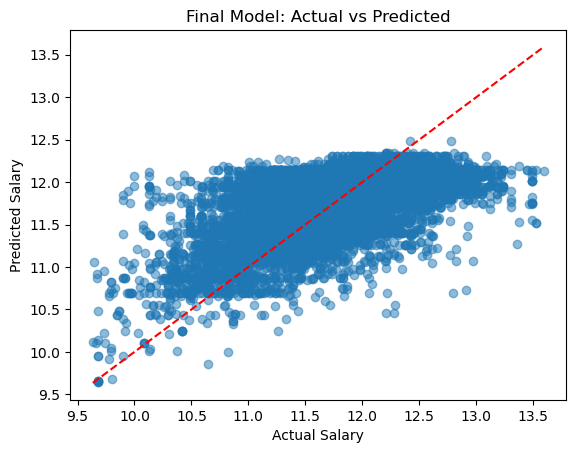

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = final_model.predict(X_test)
print(f"Test R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Final Model: Actual vs Predicted')
plt.show()

In [33]:
import joblib

# Save preprocessing objects
joblib.dump(ct, 'column_transformer.pkl')
joblib.dump(le_exp, 'label_encoder_exp.pkl')
joblib.dump(le_size, 'label_encoder_size.pkl')

# Save category orders (as Python dict)
import json
with open('category_orders.json', 'w') as f:
    json.dump({
        'experience_order': experience_order,
        'company_size_order': company_size_order,
        'nominal_features': nominal_features,
        'binary_features': binary_features
    }, f)

In [34]:
#---------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------

In [35]:
# Assuming 'best_model' and 'ct' (ColumnTransformer) are available from previous steps
# Also assuming 'experience_order', 'le_exp', 'company_size_order', 'le_size',
# 'nominal_features', 'binary_features', and 'poly' are available from previous preprocessing steps.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures if not already imported


print("=== Salary Prediction ===")
print("Please provide the following information to get a salary prediction:")

# Get user input for each feature
experience_level_input = input("Experience Level (EN, MI, SE, EX): ")
employment_type_input = input("Employment Type (FT, NFT): ")
job_title_input = input("Job Title (e.g., Data Scientist, Software Engineer): ")
remote_ratio_input = int(input("Remote Ratio (0 or 100): "))
company_location_input = input("Company Location (e.g., United States, Canada, Europe (Other)): ")
company_size_input = input("Company Size (M, L): ")

# Create a dictionary from the input
input_data = {
    'experience_level': [experience_level_input],
    'employment_type': [employment_type_input],
    'job_title': [job_title_input],
    'remote_ratio': [remote_ratio_input],
    'company_location': [company_location_input],
    'company_size': [company_size_input]
}

# Create a pandas DataFrame from the input
# We need to ensure the column order matches the order expected by the preprocessing steps.
# Let's explicitly define the columns based on how the original 'input_features' was conceptually built.
# Original columns for preprocessing were:
# 'job_title', 'company_location', 'employment_type', 'remote_ratio' (for nominal/binary)
# 'experience_level', 'company_size' (for ordinal encoding first)

input_df = pd.DataFrame(input_data)

# Recreate the DataFrame structure that was fed into the ColumnTransformer
# This involves adding the encoded ordinal features back.
# Ensure 'experience_order' and 'company_size_order' are defined from previous steps.
# Assuming le_exp and le_size were fitted on the full dataset's categories.

# Apply ordinal encoding for experience_level and company_size
# Use the fitted LabelEncoders from the preprocessing step
try:
    # Ensure the input categories are valid before transforming
    if input_df['experience_level'][0] not in experience_order:
        raise ValueError(f"Invalid experience level input: {input_df['experience_level'][0]}. Allowed values are {experience_order}")
    if input_df['company_size'][0] not in company_size_order:
         raise ValueError(f"Invalid company size input: {input_df['company_size'][0]}. Allowed values are {company_size_order}")

    input_df['experience_level_encoded'] = le_exp.transform(
        pd.Categorical(input_df['experience_level'],
                       categories=experience_order,
                       ordered=True)
    )
    input_df['company_size_encoded'] = le_size.transform(
        pd.Categorical(input_df['company_size'],
                       categories=company_size_order,
                       ordered=True)
    )
except ValueError as e:
    print(f"Error encoding ordinal features: {e}")
    # Exit or handle this error gracefully
    exit()


# Select the columns that were used to fit the ColumnTransformer
# nominal_features = ['job_title', 'company_location', 'employment_type']
# binary_features = ['remote_ratio']
# encoded ordinal features were 'experience_level_encoded', 'company_size_encoded'

input_features_for_ct = input_df[nominal_features + binary_features + ['experience_level_encoded', 'company_size_encoded']]


# Apply the ColumnTransformer
try:
    # Use handle_unknown='ignore' in OneHotEncoder during fitting if you anticipate unseen categories in the future,
    # though it was already set in the previous transformation cell.
    # If an error occurs here, it's likely due to a new category not handled by 'ignore'.
    input_transformed = ct.transform(input_features_for_ct)
except ValueError as e:
    print(f"Error during transformation: {e}. This might be due to unseen categories in your input.")
    print("Please ensure your input values are among the categories seen during training or that 'handle_unknown' is set correctly.")
    # Exit or handle this error gracefully
    exit()


# If interaction features were used during training, create them for the input
# Assuming 'poly' (PolynomialFeatures) is available from previous steps
# Need to ensure poly is defined and fitted before this point.
# Check if 'poly' is in the current scope.
if 'poly' in globals() and poly is not None:
    input_transformed_with_interactions = poly.transform(input_transformed)
elif 'poly' in locals() and poly is not None:
     input_transformed_with_interactions = poly.transform(input_transformed)
else:
    print("Warning: PolynomialFeatures transformer 'poly' not found. Proceeding without interaction features.")
    input_transformed_with_interactions = input_transformed


# Make a prediction using the best model
# Assuming 'best_model' is defined and fitted from previous steps.
# Check if 'best_model' is in the current scope.
if 'best_model' in globals() and best_model is not None:
    predicted_log_salary = best_model.predict(input_transformed_with_interactions)
elif 'best_model' in locals() and best_model is not None:
     predicted_log_salary = best_model.predict(input_transformed_with_interactions)
else:
    print("Error: Best model 'best_model' not found. Cannot make prediction.")
    exit()


# Convert the log-transformed prediction back to USD
predicted_salary_usd = np.exp(predicted_log_salary)[0] # Get the single prediction value

print(f"\nPredicted Salary in USD: ${predicted_salary_usd:,.2f}")

=== Salary Prediction ===
Please provide the following information to get a salary prediction:

Predicted Salary in USD: $65,735.12


c:\Users\ayushi uniyal\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
